In [21]:
import sys
import pickle

import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import fixed
import matplotlib.pyplot as plt
import seaborn as sns

from functions import get_topic_common_decisions,find_elements,get_element_topic_info,plot_topic_evolution

In [4]:
corpus='TH'
element='w'
path='./topic_model_data/'
memberships_df=pd.read_pickle(path+element+'_memberships_df.pkl')

with open(path+element+'_topics_h-structure.pkl','rb') as in_f:
    topic_memb=pickle.load(in_f)

element_list=list(memberships_df.index)
decisions_list=np.load(path+corpus+'-d'+element+'_decisions_list.npy')

decisions_df=pd.read_pickle(path+'th-'+element+'_decisions_df.pkl')

In [10]:
decisions_df=decisions_df.astype({'date_years':int})
years=np.arange(2001,2019)
N_dpy=[]
for y in years:
    N_dpy.append(len(decisions_df.loc[decisions_df.date_years==y]))

In [65]:
hl=2
p_t_y=np.load(path+corpus+'-'+element+'_years_distribution_hl-'+str(hl)+'.npy')

In [69]:
factor=np.array(N_dpy)*400

In [70]:
p_y_t=np.transpose(p_t_y)
for i in range(len(p_y_t)):
    p_y_t[i]=p_y_t[i]*factor[i]

In [71]:
p_t_y=np.transpose(p_y_t)

In [23]:
t_down_idx=[28,12,30]
t_updown_idx=[116,74,123,108]
t_up_idx=[79,98,103,133,14]

In [25]:
years_sel=years

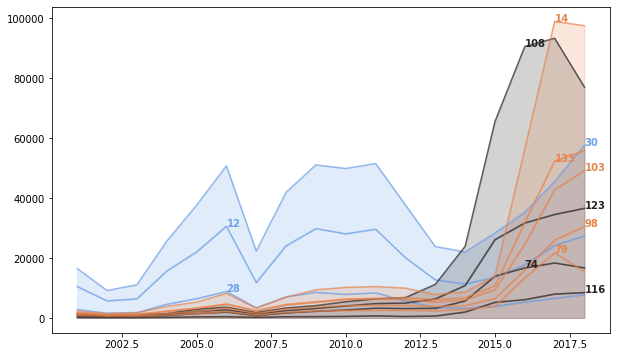

In [28]:
colors=sns.diverging_palette(250, 30, l=65, center="dark", n=3)

plt.figure(figsize=(10,6))

old=np.zeros(len(years_sel))
for i in range(len(t_down_idx)):
    t=t_down_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[0],alpha=0.2)
    plt.plot(years_sel,new,color=colors[0],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_down_idx[i]),color=colors[0],fontsize='medium',fontweight='bold')
    old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_updown_idx)):
    t=t_updown_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[1],alpha=0.2)
    plt.plot(years_sel,new,color=colors[1],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_updown_idx[i]),color=colors[1],fontsize='medium',fontweight='bold')  
    old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_up_idx)):
    t=t_up_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[2],alpha=0.2)
    plt.plot(years_sel,old+p_t_y[t],color=colors[2],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_up_idx[i]),color=colors[2],fontsize='medium',fontweight='bold')
    old=new

Text(0, 0.5, 'Topic relative importance')

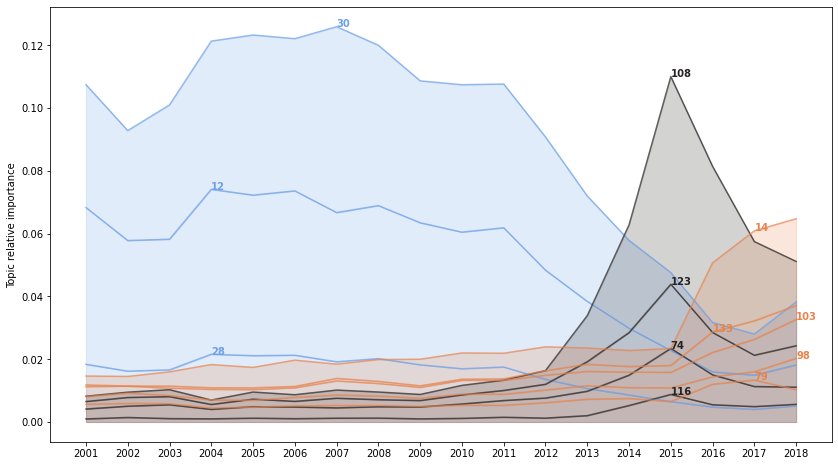

In [66]:
colors=sns.diverging_palette(250, 30, l=65, center="dark", n=3)

plt.figure(figsize=(14,8))

old=np.zeros(len(years_sel))
for i in range(len(t_down_idx)):
    t=t_down_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[0],alpha=0.2)
    plt.plot(years_sel,new,color=colors[0],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_down_idx[i]),color=colors[0],fontsize='medium',fontweight='bold')
    old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_updown_idx)):
    t=t_updown_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[1],alpha=0.2)
    plt.plot(years_sel,new,color=colors[1],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_updown_idx[i]),color=colors[1],fontsize='medium',fontweight='bold')  
    old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_up_idx)):
    t=t_up_idx[i]
    new=p_t_y[t]+old
    plt.fill_between(years_sel,old,new,color=colors[2],alpha=0.2)
    plt.plot(years_sel,old+p_t_y[t],color=colors[2],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_up_idx[i]),color=colors[2],fontsize='medium',fontweight='bold')
    old=new
    
plt.xticks(years,years)    
    
plt.ylabel('Topic relative importance')    

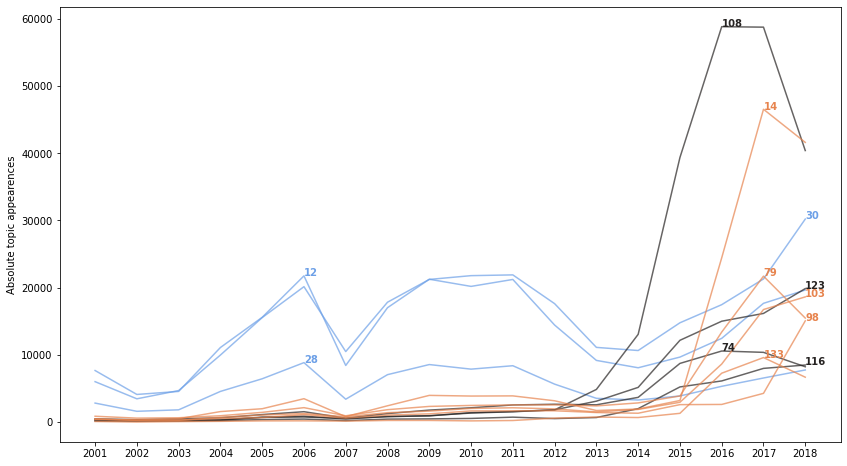

In [72]:
colors=sns.diverging_palette(250, 30, l=65, center="dark", n=3)

plt.figure(figsize=(14,8))
#plt.plot(years_sel,factor/30,'--',color='black')

old=np.zeros(len(years_sel))
for i in range(len(t_down_idx)):
    t=t_down_idx[i]
    new=p_t_y[t]+old
    #plt.fill_between(years_sel,old,new,color=colors[0],alpha=0.2)
    plt.plot(years_sel,new,color=colors[0],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_down_idx[i]),color=colors[0],fontsize='medium',fontweight='bold')
    #old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_updown_idx)):
    t=t_updown_idx[i]
    new=p_t_y[t]+old
#     plt.fill_between(years_sel,old,new,color=colors[1],alpha=0.2)
    plt.plot(years_sel,new,color=colors[1],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_updown_idx[i]),color=colors[1],fontsize='medium',fontweight='bold')  
#     old=new
    
old=np.zeros(len(years_sel))    
for i in range(len(t_up_idx)):
    t=t_up_idx[i]
    new=p_t_y[t]+old
#     plt.fill_between(years_sel,old,new,color=colors[2],alpha=0.2)
    plt.plot(years_sel,old+p_t_y[t],color=colors[2],alpha=0.7)
    x_idx=np.argmax(p_t_y[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_up_idx[i]),color=colors[2],fontsize='medium',fontweight='bold')
#     old=new   

plt.ylabel('Absolute topic appearences')
plt.xticks(years,years)
plt.show()

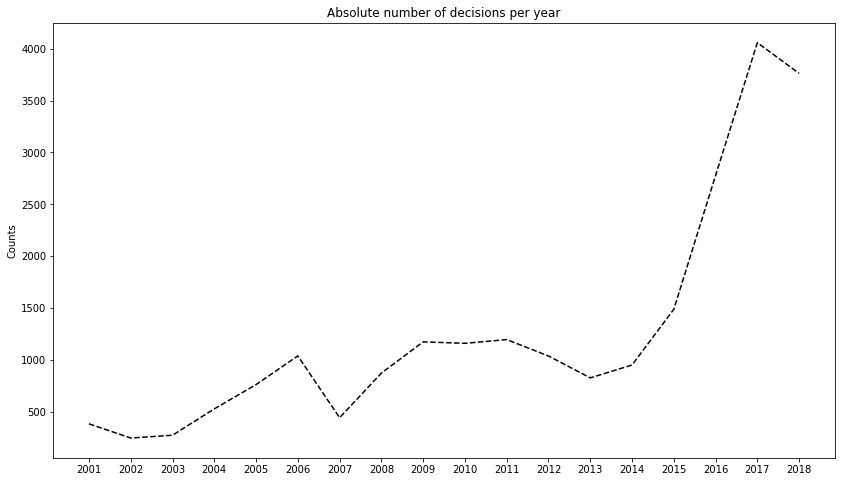

In [64]:
plt.figure(figsize=(14,8))
plt.plot(years_sel,N_dpy,'--',color='black')
plt.title('Absolute number of decisions per year')
plt.ylabel('Counts')
plt.xticks(years,years)
plt.show()

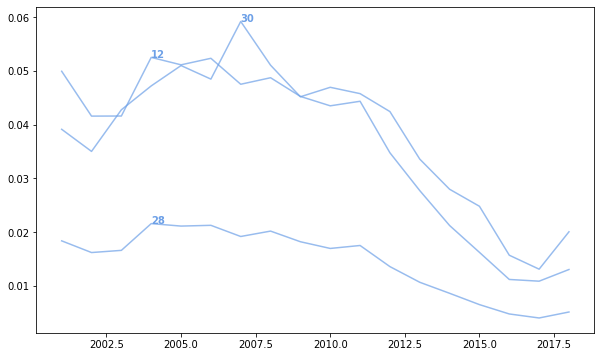

In [37]:
colors=sns.diverging_palette(250, 30, l=65, center="dark", n=3)

plt.figure(figsize=(10,6))

old=np.zeros(len(years_sel))
for i in range(len(t_down_idx)):
    t=t_down_idx[i]
    new=p_t_y_rel[t]+old
    #plt.fill_between(years_sel,old,new,color=colors[0],alpha=0.2)
    plt.plot(years_sel,new,color=colors[0],alpha=0.7)
    x_idx=np.argmax(p_t_y_rel[t])
    plt.text(years_sel[x_idx],new[x_idx],str(t_down_idx[i]),color=colors[0],fontsize='medium',fontweight='bold')
    #old=new